**Import Library**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
import seaborn as sns
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')
import os
for dirname, _, _ in os.walk('dataset_klasifikasi_sampah'):
        print(dirname)

In [ ]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [ ]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 13.4 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=ca2729f1d6dd814bfad48bbb3c76cf90cd3c56fdcd76d92725122638d6896095
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [ ]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 104.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 26.0 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102745 sha256=639d33d969a27577dbbd5ebb02ab89a7ab4152cee1f7bf59c2eb9047e5fd38da
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array
from keras.utils.vis_utils import plot_model
from glob import glob

**Load data dari Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/dataset_klasifikasi_sampah.zip

Streaming output truncated to the last 5000 lines.
  inflating: dataset_sampah/test/anorganik/anorganik_135.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_14.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_140.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_144.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_146.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_152.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_157.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_158.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_164.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_168.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_171.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_176.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_179.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_184.jpg  
  inflating: dataset_sampah/test/anorganik/anorganik_188.jpg  
  inf

In [ ]:
train_path = "dataset_sampah/train/"
test_path = "dataset_sampah/test/"

**Visualisasi**

In [ ]:
x_data = []
y_data = []

for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array=cv2.imread(file)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split("/")[-1])

data=pd.DataFrame({'image': x_data,'label': y_data})

100%|██████████| 800/800 [00:01<00:00, 627.06it/s]


In [ ]:
data.shape

(4000, 2)

In [ ]:
from collections import Counter
Counter(y_data)

Counter({'b3': 800,
         'anorganik': 800,
         'organik': 800,
         'residu': 800,
         'kertas': 800})

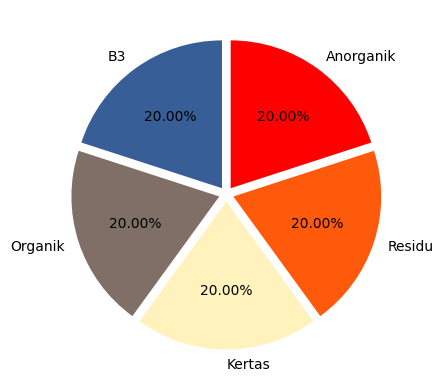

In [ ]:
colors = ['#375e97', '#806f66', '#fff2bc', '#ff5a0b', '#ff0000']
plt.pie(data.label.value_counts(),startangle=90,explode=[0.05,0.05,0.05,0.05,0.05],autopct='%0.2f%%',
        labels=['B3', 'Organik','Kertas','Residu','Anorganik'], colors= colors,radius=1)
plt.show()

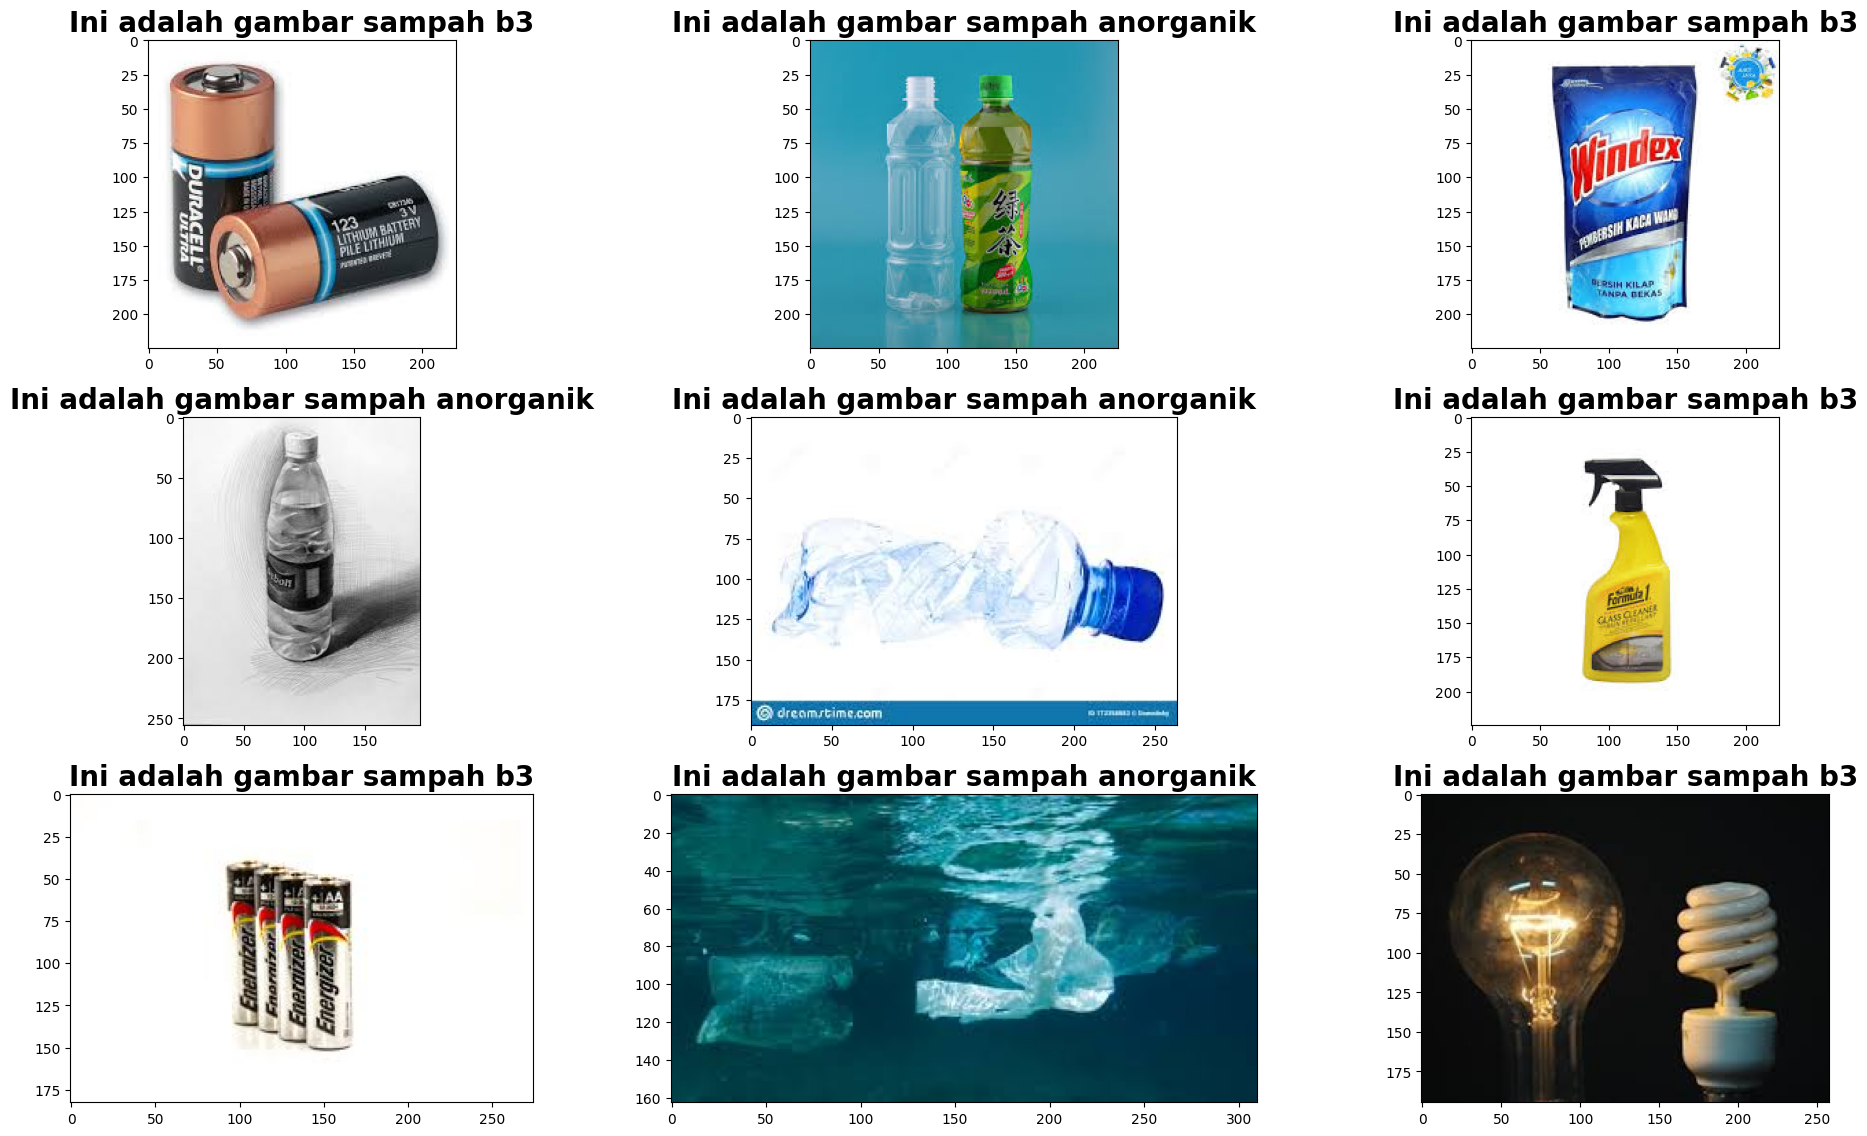

In [ ]:
plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    index=np.random.randint(1800)
    plt.title('Ini adalah gambar sampah {0}'.format(data.label[index]),fontdict={'size':20,'weight':'bold'})
    plt.imshow(data.image[index])
    plt.tight_layout()

In [ ]:
className = glob(train_path + '/*' )
numberOfClass = len(className)
print("Number Of Class: ",numberOfClass)

Number Of Class:  5


**Membuat model Convolutional Neural Network (CNN)**

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = (224,224,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Conv2D(128,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(numberOfClass)) # output
model.add(Activation("softmax"))

model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics = ["accuracy"])

batch_size = 256

In [ ]:
# semua image akan direscaled dengan 1./255.
train_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
test_datagen = ImageDataGenerator(rescale= 1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

test_generator = test_datagen.flow_from_directory(
        test_path,
        target_size= (224,224),
        batch_size = batch_size,
        color_mode= "rgb",
        class_mode= "categorical")

Found 4000 images belonging to 5 classes.
Found 1000 images belonging to 5 classes.


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop=EarlyStopping(monitor='val_loss',patience=7)

In [ ]:
mc = tf.keras.callbacks.ModelCheckpoint('model_sampah_skenario1.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
history = model.fit(
            train_generator,
            epochs=20,
            validation_data = test_generator,
            callbacks = [mc],
            )

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 1.8030 - accuracy: 0.2772
Epoch 1: val_loss improved from inf to 1.49695, saving model to model_sampah_skenario1.h5
16/16 [==============================] - 49s 2s/step - loss: 1.8030 - accuracy: 0.2772 - val_loss: 1.4970 - val_accuracy: 0.2790
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 1.4744 - accuracy: 0.3408
Epoch 2: val_loss improved from 1.49695 to 1.36922, saving model to model_sampah_skenario1.h5
16/16 [==============================] - 17s 1s/step - loss: 1.4744 - accuracy: 0.3408 - val_loss: 1.3692 - val_accuracy: 0.4100
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 1.4317 - accuracy: 0.3618
Epoch 3: val_loss improved from 1.36922 to 1.34920, saving model to model_sampah_skenario1.h5
16/16 [==============================] - 17s 1s/step - loss: 1.4317 - accuracy: 0.3618 - val_loss: 1.3492 - val_accuracy: 0.4700
Epoch 4/20
16/16 [==============================] - E

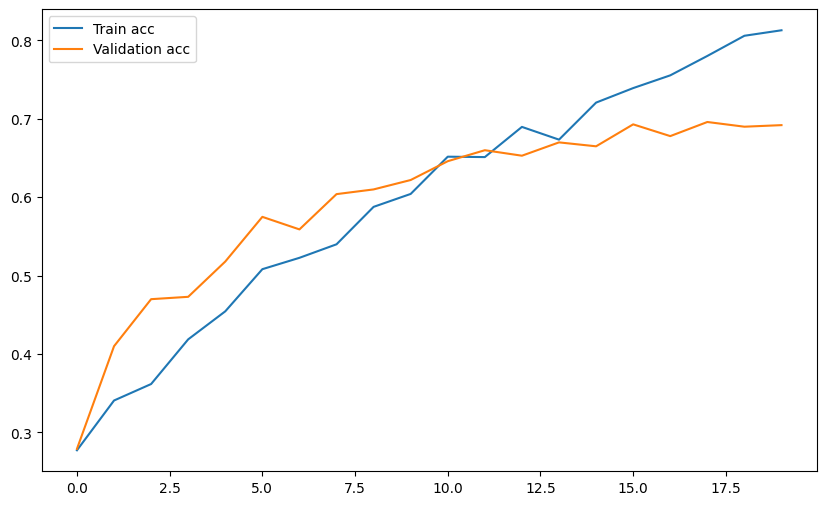

In [ ]:
plt.figure(figsize=[10,6])
plt.plot(history.history["accuracy"], label = "Train acc")
plt.plot(history.history["val_accuracy"], label = "Validation acc")
plt.legend()
plt.show()

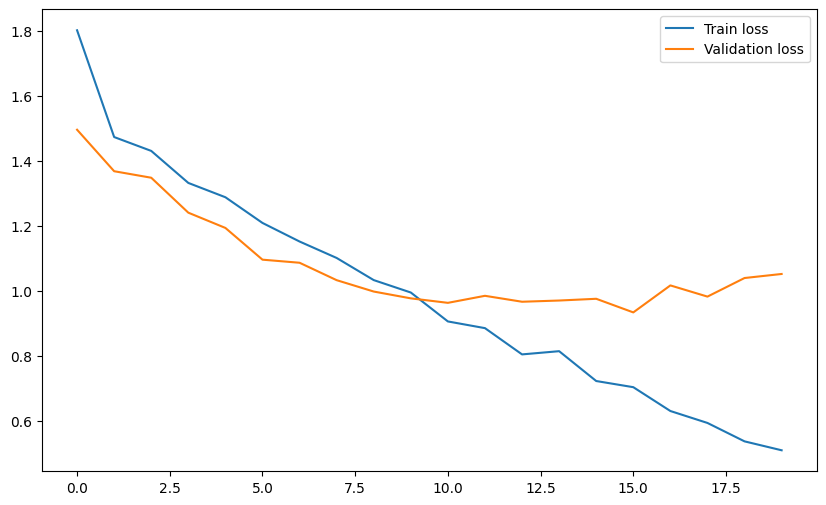

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label = "Train loss")
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.legend()
plt.show()

**Model Evaluation**

In [ ]:
import tensorflow as tf
final_model = tf.keras.models.load_model('model_sampah_skenario1.h5')

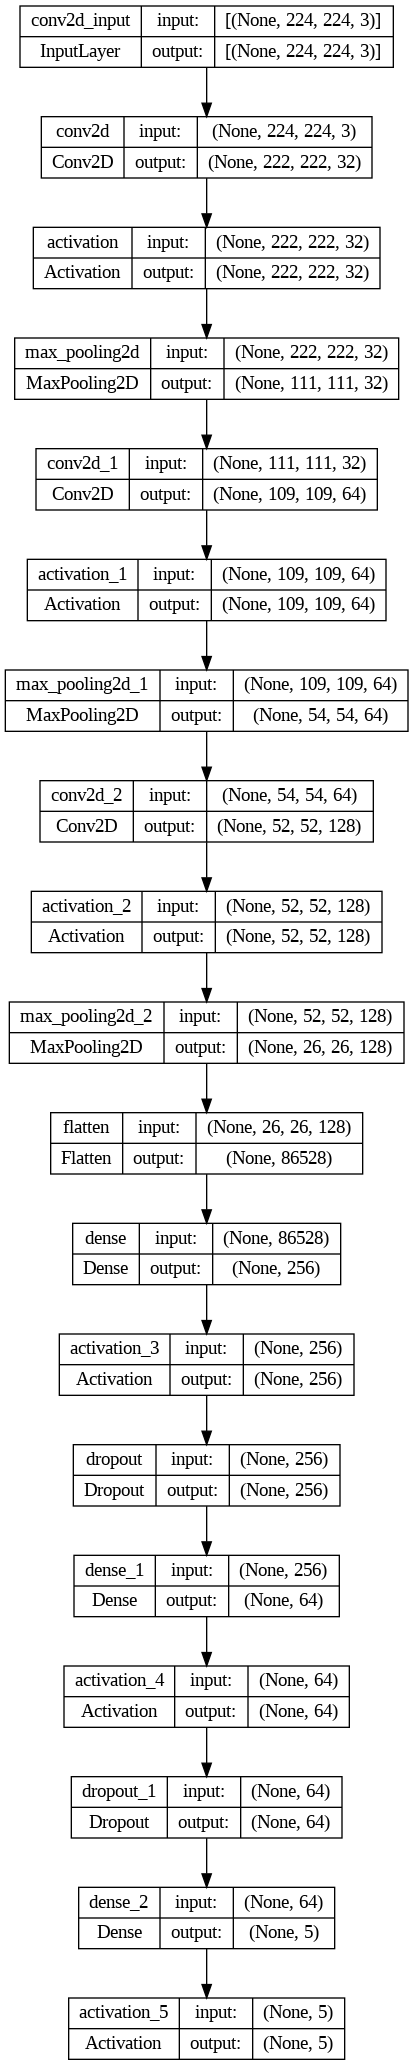

In [ ]:
tf.keras.utils.plot_model(final_model, show_shapes=True)

In [ ]:
test_generator = test_datagen.flow_from_directory(
    #train_data_dir, # same directory as training data
    train_path,
    target_size=(224, 224),
    batch_size= batch_size,
    class_mode='categorical',
    shuffle = False,
) # set as validation data

Found 4000 images belonging to 5 classes.


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
predict = final_model.predict(test_generator)
predictions = []
for i in range(len(predict)):
    predictions.append(np.argmax(predict[i]))

cm = confusion_matrix(test_generator.classes, predictions)

print(cm)
print(classification_report(test_generator.classes, predictions))


16/16 [==============================] - 12s 752ms/step
[[576  60  36  26 102]
 [ 99 616  26  24  35]
 [ 38  12 727   9  14]
 [  5   2   7 781   5]
 [ 63  11   6  12 708]]
              precision    recall  f1-score   support

           0       0.74      0.72      0.73       800
           1       0.88      0.77      0.82       800
           2       0.91      0.91      0.91       800
           3       0.92      0.98      0.95       800
           4       0.82      0.89      0.85       800

    accuracy                           0.85      4000
   macro avg       0.85      0.85      0.85      4000
weighted avg       0.85      0.85      0.85      4000



[Text(0, 0.5, 'anorganik'),
 Text(0, 1.5, 'b3'),
 Text(0, 2.5, 'kertas'),
 Text(0, 3.5, 'organik'),
 Text(0, 4.5, 'residu')]

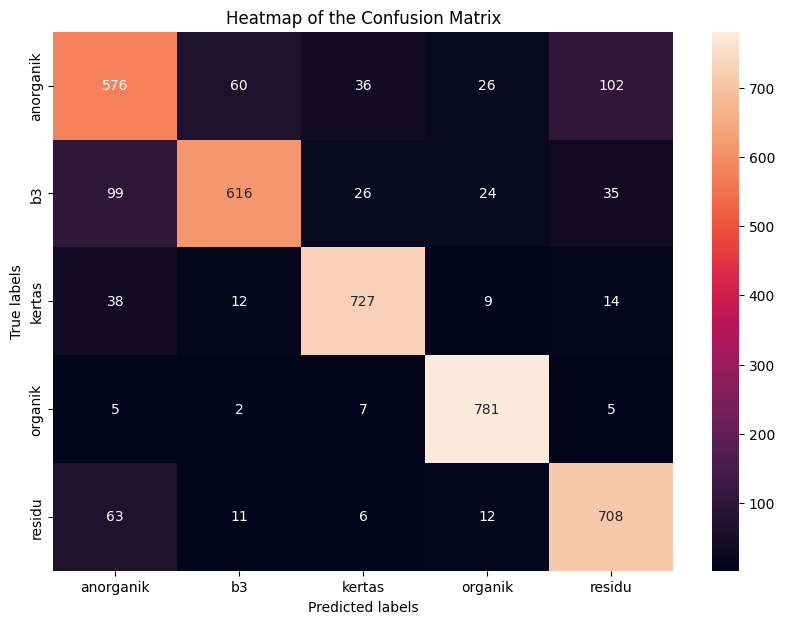

In [ ]:
target_names = ['anorganik','b3','kertas','organik','residu']

fig,ax=plt.subplots(1,1,
                    figsize=(10,7)
                   )

sns.heatmap(cm, annot=True, fmt='g', ax=ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Heatmap of the Confusion Matrix');
ax.xaxis.set_ticklabels(target_names); ax.yaxis.set_ticklabels(target_names)

**Model Prediction**

8/8 [==============================] - 1s 17ms/step


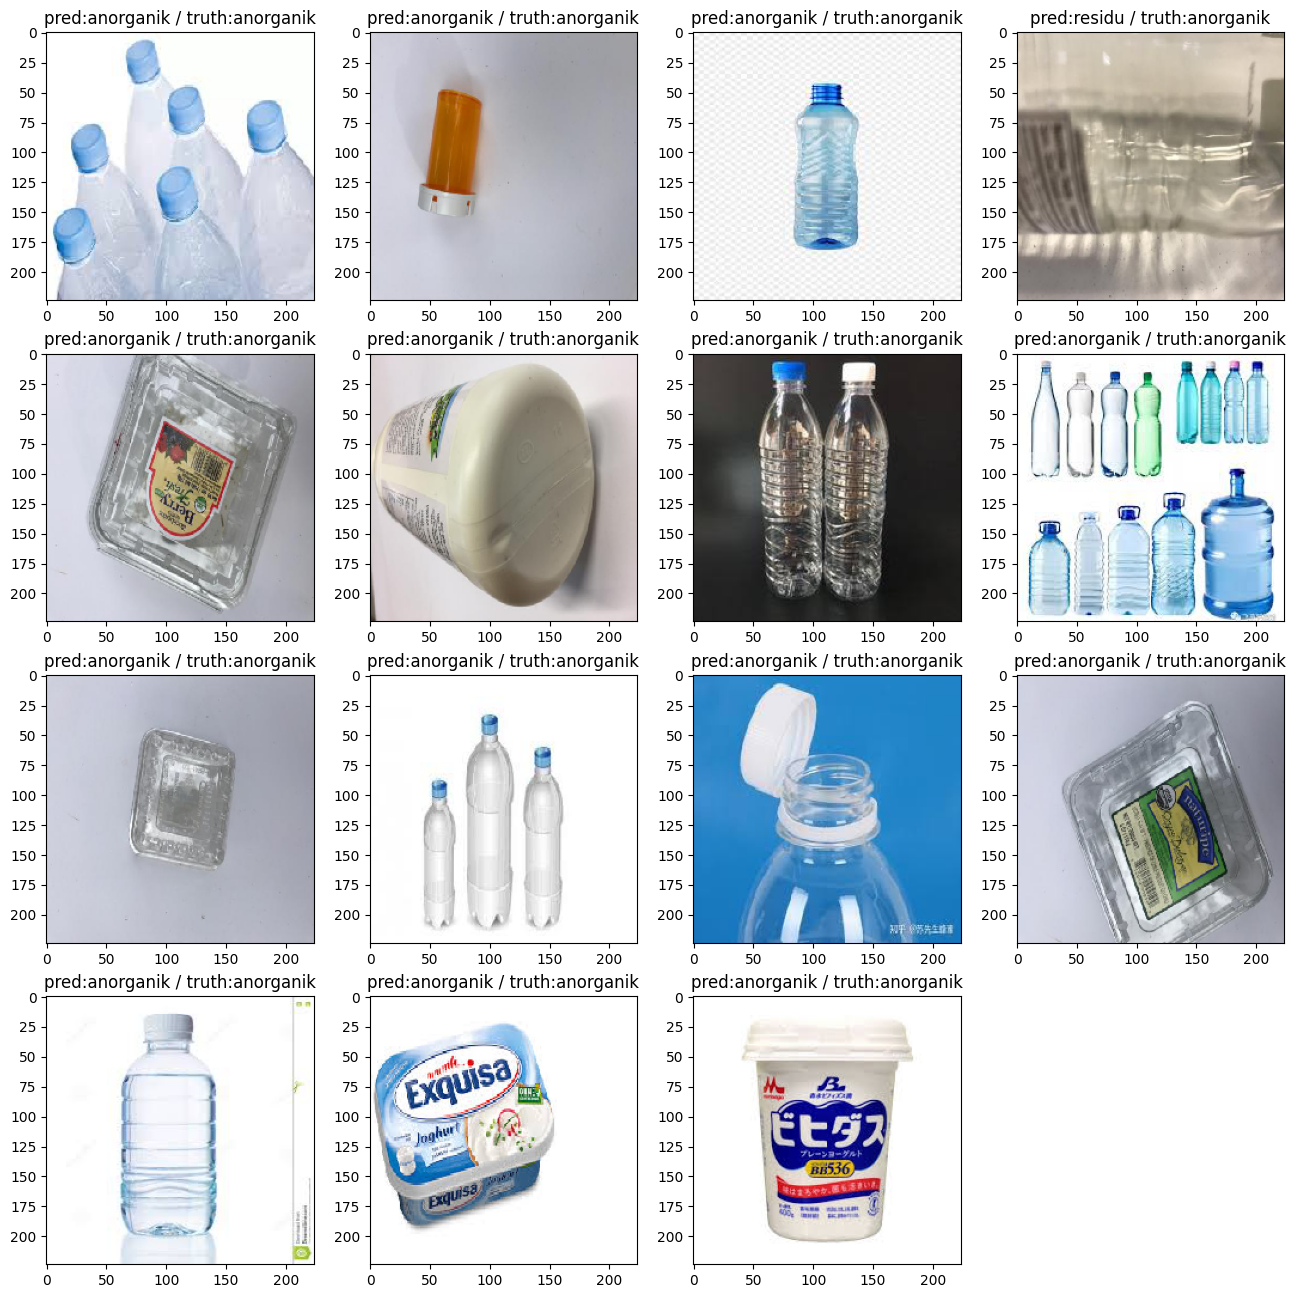

In [ ]:
test_x, test_y = test_generator.__getitem__(1)

labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())

preds = model.predict(test_x)

plt.figure(figsize=(16, 16))
for i in range(15):
    plt.subplot(4, 4, i+1)
    plt.title('pred:%s / truth:%s' % (labels[np.argmax(preds[i])], labels[np.argmax(test_y[i])]))
    plt.imshow(test_x[i])